In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [89]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [90]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [92]:
data.shape

(32560, 15)

In [93]:
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

 There is no null values in the dataset.

In [94]:
data['Workclass'].unique(),data['Occupation'].unique(),data['Native_country'].unique()

(array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
        ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
        ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
        ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
        ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object),
 array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
        ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
        ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
        ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
        ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
        ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
        ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
        ' Trinada

In [95]:
round((data.isin([' ?']).sum()/data.shape[0])*100,2).astype(str)+'%'

Age                0.0%
Workclass         5.64%
Fnlwgt             0.0%
Education          0.0%
Education_num      0.0%
Marital_status     0.0%
Occupation        5.66%
Relationship       0.0%
Race               0.0%
Sex                0.0%
Capital_gain       0.0%
Capital_loss       0.0%
Hours_per_week     0.0%
Native_country    1.79%
Income             0.0%
dtype: object

In [96]:
data = data.replace(' ?',np.NaN)

In [97]:
data.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [98]:
columns_with_nan = ["Workclass", "Occupation", "Native_country"]

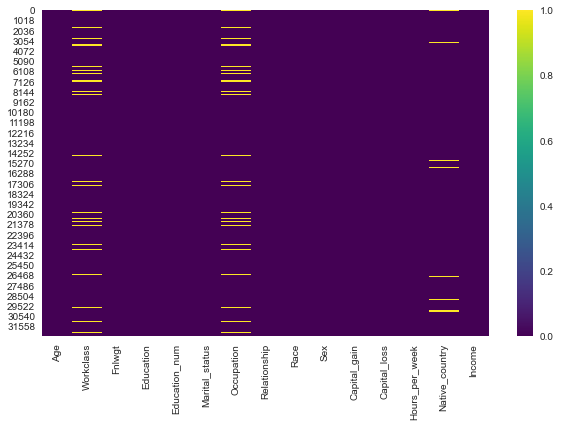

In [99]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap='viridis')
plt.show()

In [100]:
for col in columns_with_nan:
    data[col].fillna(data[col].mode()[0], inplace=True)

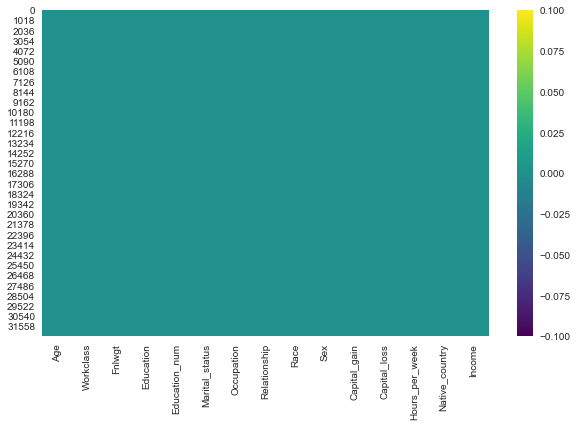

In [101]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap='viridis')
plt.show()

In [102]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Explratory Data Analysis 

### Univariate Analysis

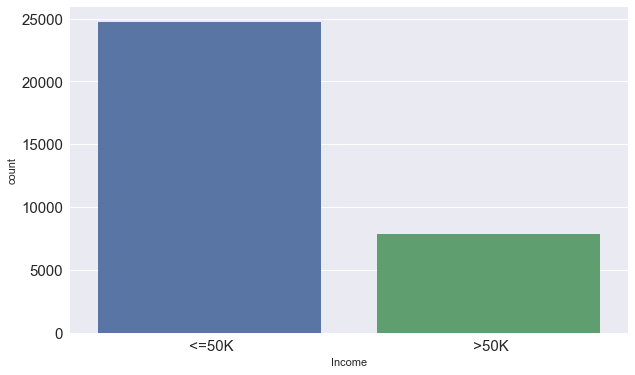

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [104]:
plt.figure(figsize = (10,6),facecolor='White')
sns.countplot(x='Income', data = data)
plt.tick_params(labelsize=15)
plt.show()


data['Income'].value_counts()

#### Observation:
The highest number of population are earning less than 50k


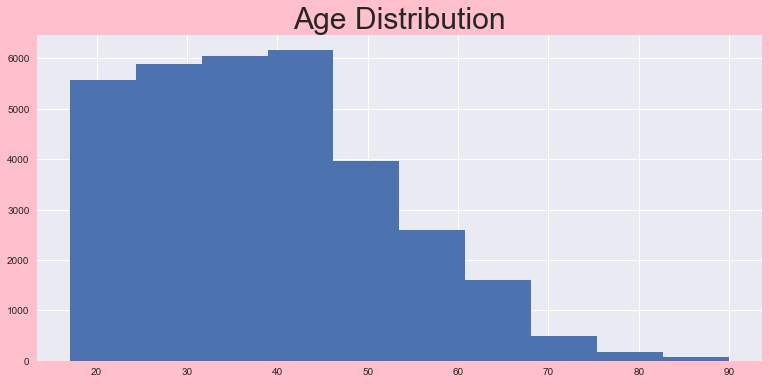

In [105]:
plt.figure(figsize = (13,6),facecolor='pink')
plt.hist(data['Age'])
plt.title("Age Distribution", fontsize = 30)

plt.show()

People between age group 20-40 are highest working population.

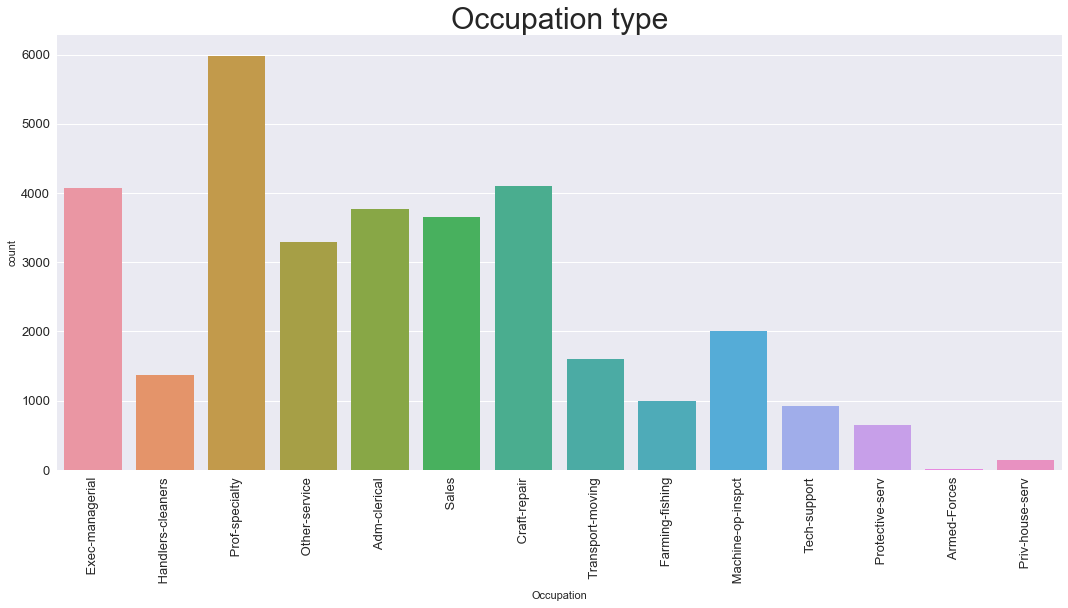

In [106]:
plt.figure(figsize = (18,8))
ax=sns.countplot(x="Occupation", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tick_params(labelsize=13)
plt.title("Occupation type", fontsize = 30)
plt.show()

Highest number of population are in PROF-SPECIALITY occupation.

Armed Forces have least number of population among all the occupations.

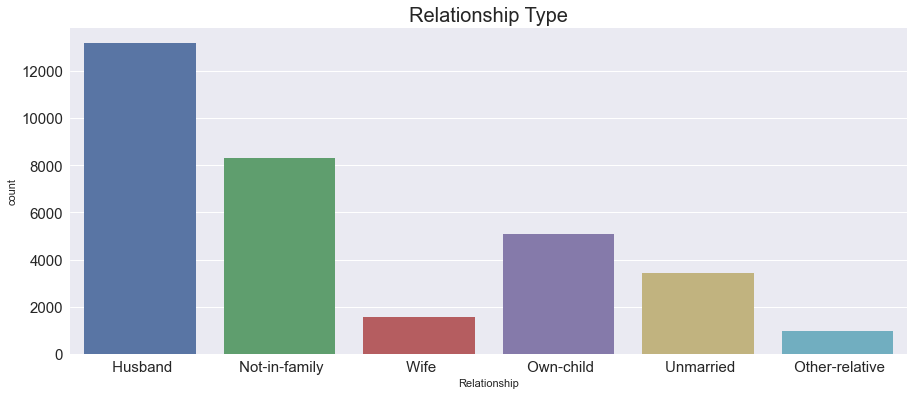

In [107]:
plt.figure(figsize = (15,6))
sns.countplot(x="Relationship", data=data)
plt.title("Relationship Type", fontsize = 20)
plt.tick_params(labelsize=15)
plt.show()

Husband have highest percentage in working profile.

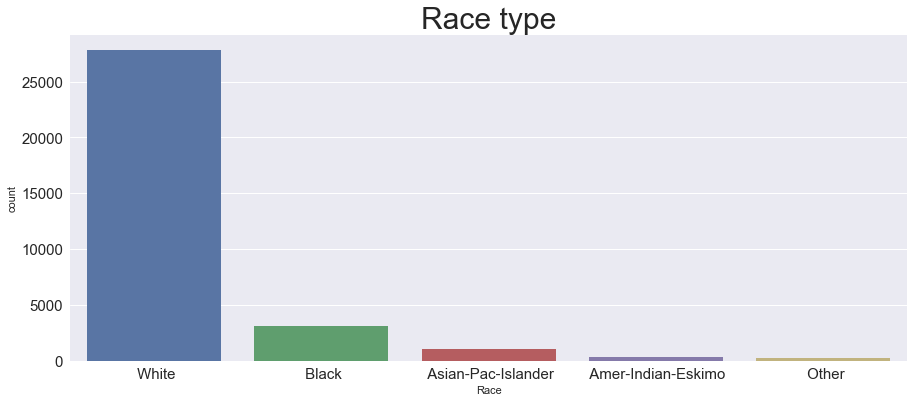

In [108]:
plt.figure(figsize = (15,6))
sns.countplot(x="Race", data=data)
plt.title("Race type", fontsize = 30)
plt.tick_params(labelsize=15)
plt.show()

Population of White race is highest.

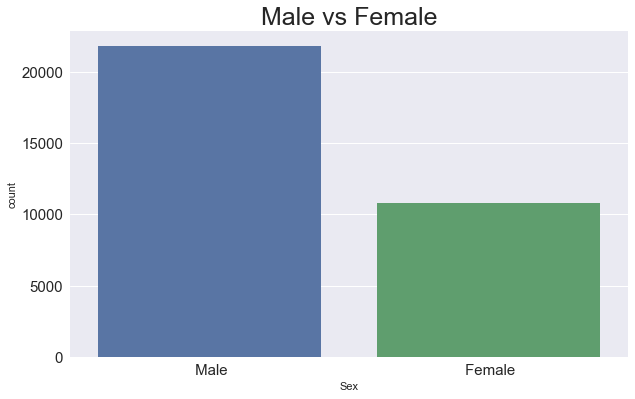

In [109]:
plt.figure(figsize = (10,6))
sns.countplot(x="Sex", data=data)
plt.title("Male vs Female", fontsize = 25)
plt.tick_params(labelsize=15)
plt.show()

No. of count for male is higher than female.

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

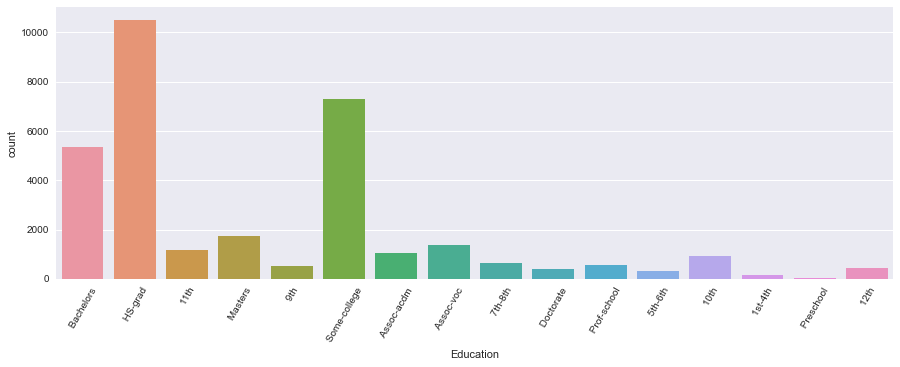

In [110]:
plt.figure(figsize = [15,5])
sns.countplot(x='Education',data=data)
plt.xticks(rotation=60)

data['Education'].value_counts()

Max people have been HS-GRAD.

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

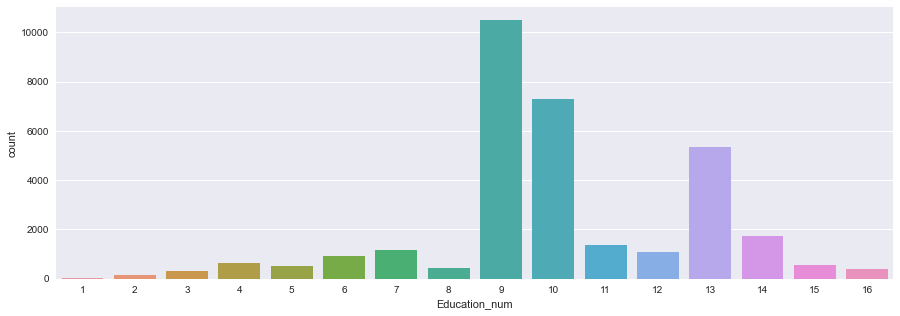

In [111]:
plt.figure(figsize = [15,5])

sns.countplot(x='Education_num',data=data)
plt.xticks()

data['Education_num'].value_counts()

# Bivariate Analysis

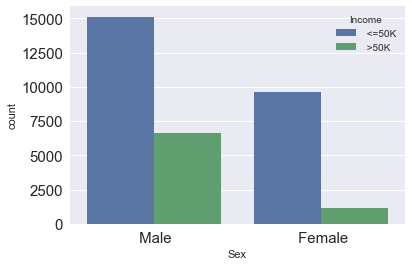

In [112]:
sns.countplot(data['Sex'],hue=data['Income'])
plt.tick_params(labelsize=15)

Percentage of Males are earning over ">50K" are higher than female.

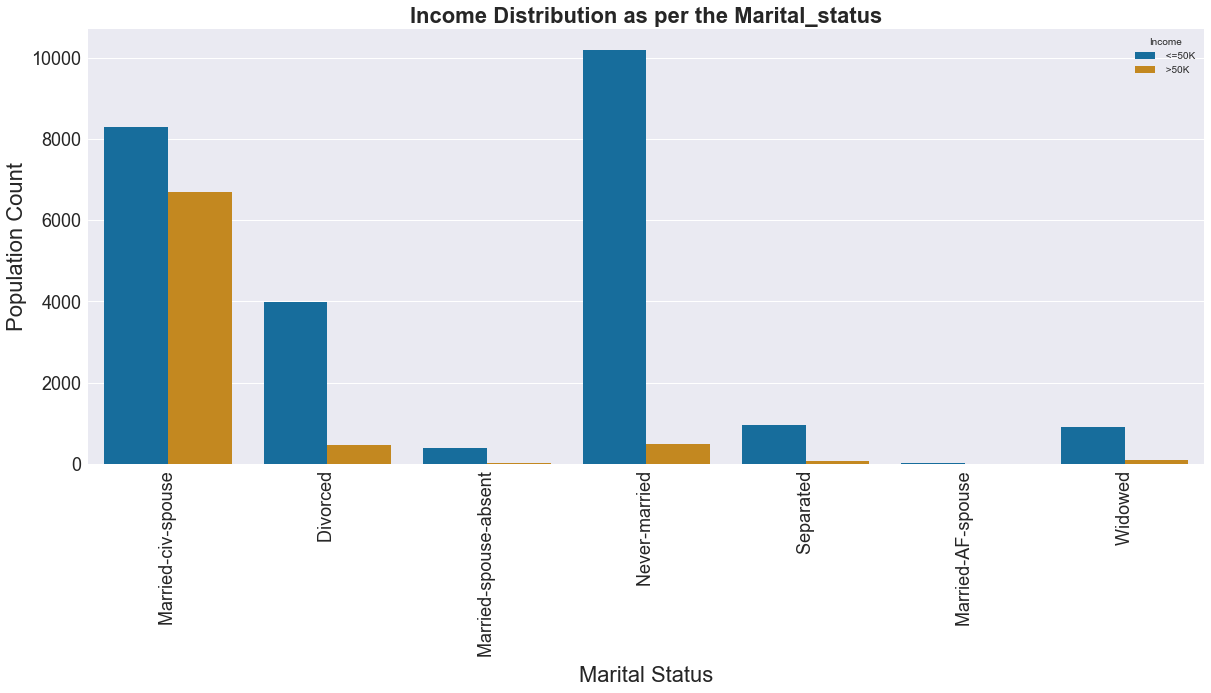

In [113]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 8))
sns.countplot(data['Marital_status'],hue=data['Income'], palette='colorblind')
plt.title('Income Distribution as per the Marital_status', fontdict={'fontsize': 22, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={'fontsize': 22})
plt.ylabel('Population Count', fontdict={'fontsize': 22})
plt.xticks(rotation=90)
plt.tick_params(labelsize=18)
plt.show()

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

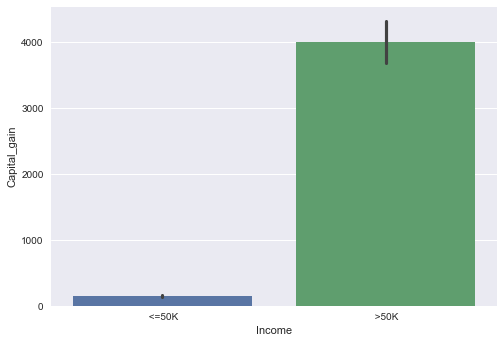

In [114]:
sns.barplot(x = 'Income', y = 'Capital_gain', data = data)

people earning more than 50k are leading to more capital gain.

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

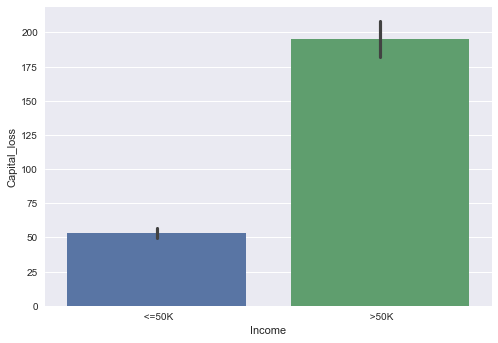

In [115]:
sns.barplot(x = 'Income', y = 'Capital_loss', data = data)

people earning more than 50k are leading to more capital loss.

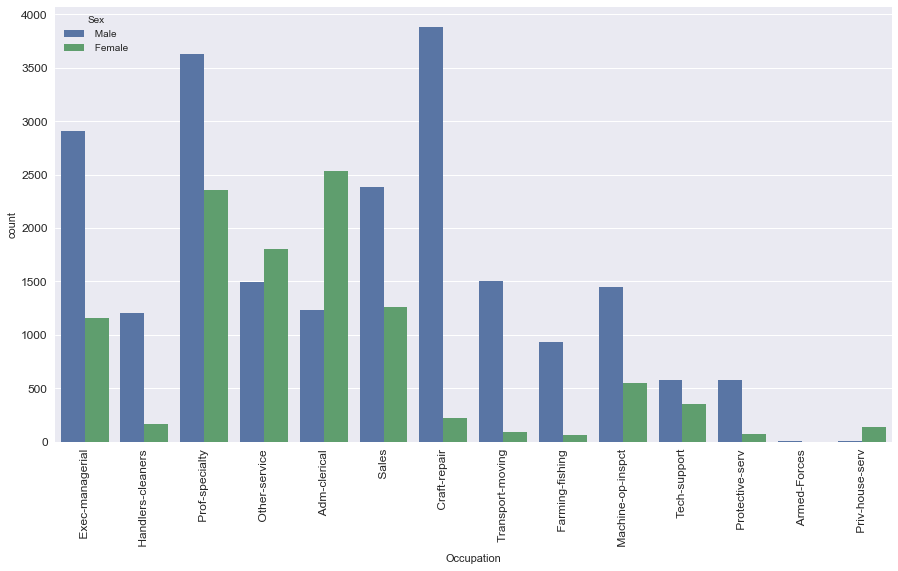

In [116]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data['Occupation'], hue=data['Sex'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tick_params(labelsize=12)
plt.show()

In most of the occupation number of males compared to females are high.

# Multivariate Analysis

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

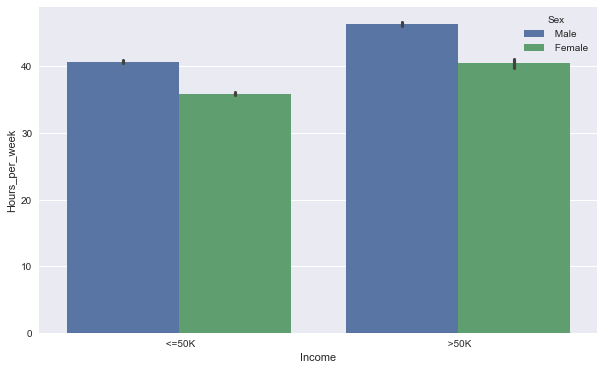

In [117]:
plt.figure(figsize = (10,6))
sns.barplot(x=data['Income'],y=data['Hours_per_week'],hue=data['Sex'])

working hours of male and female are higher who are earning more than 50k.

# Correlation

Heatmap plotting

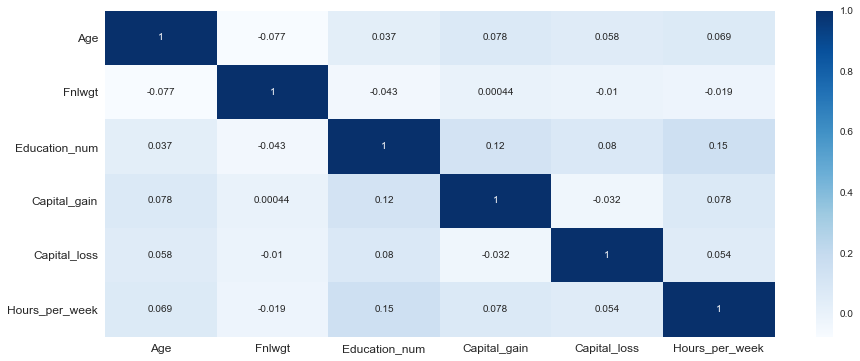

In [118]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.tick_params(labelsize=12)

plt.show()

In [119]:
data.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


In [120]:
data = data.drop(columns = ['Education_num'])

dropped one column

# Removing Outliers

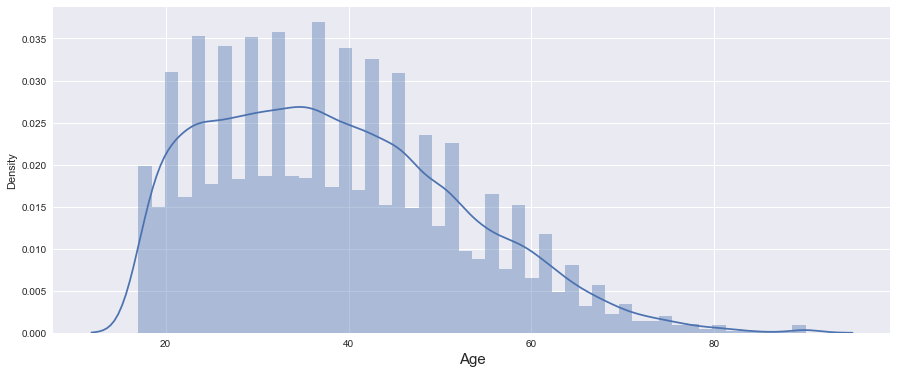

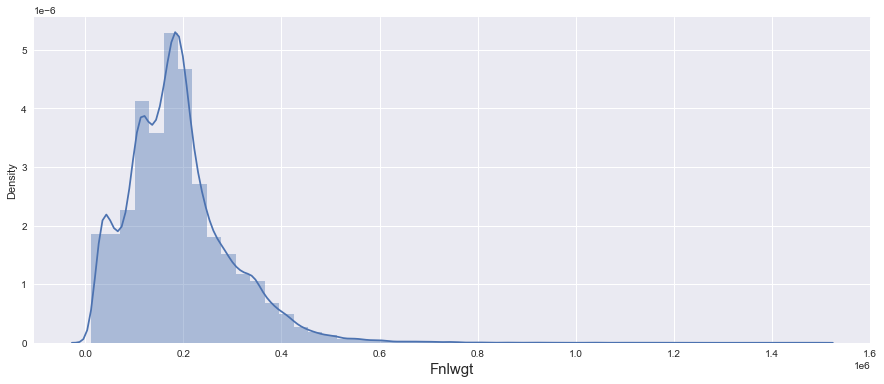

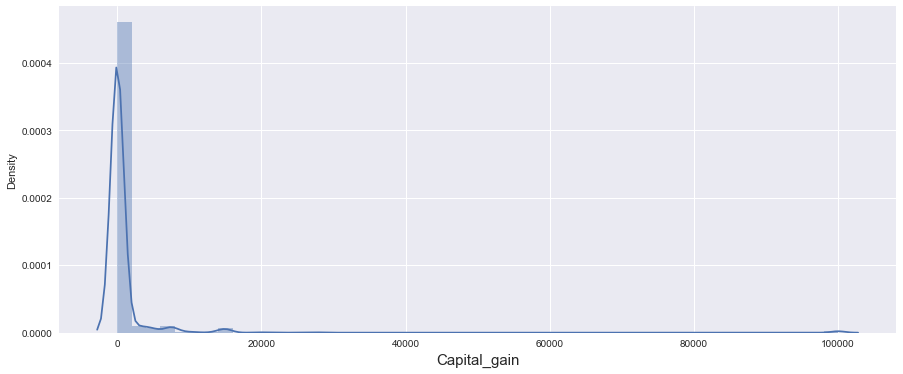

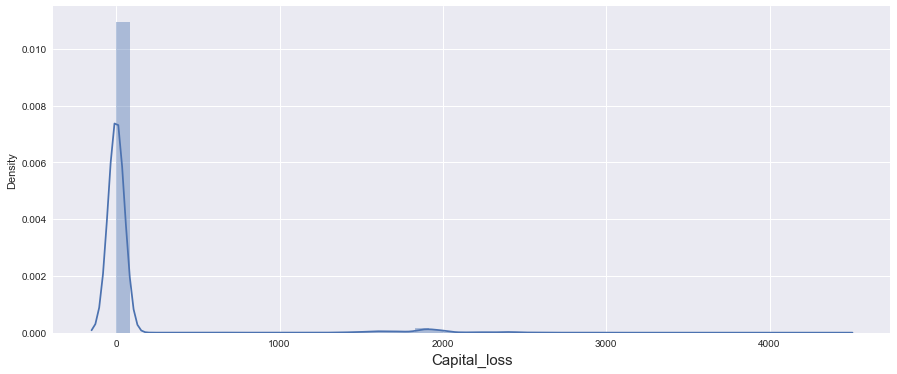

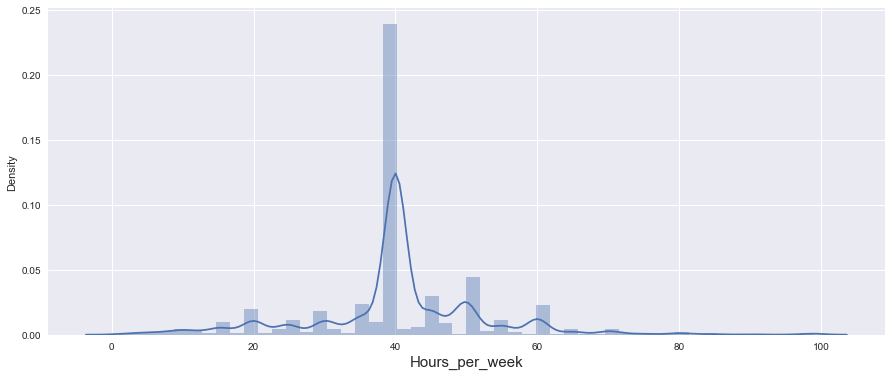

In [121]:
for i in data.columns:
    
    if data[i].dtype!='object':
        plt.figure(figsize=[15,6])
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=15)
    plt.show()

In [122]:
features = ['Age', 'Fnlwgt','Capital_gain', 'Capital_gain','Hours_per_week']

# IQR Method

In [123]:
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3-Q1

data_new1 = data[~((data[features] < (Q1-1.5*IQR)) | (data[features]> (Q3 + 1.5*Q3))).any(axis = 1)]

In [124]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new1.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (32560, 14)
Shape After          : (24491, 14)
Percentage Loss      : 24.78194103194103


# z-score Method

In [125]:
from scipy.stats import zscore  

z=np.abs(zscore(data[features]))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]

In [126]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new2.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (32560, 14)
Shape After          : (31461, 14)
Percentage Loss      : 3.3753071253071254


After applying z-score method percentage loss is less.

In [127]:
data_new = data_new2.copy()

# Skewness

In [128]:
data.skew()

Age                0.558738
Fnlwgt             1.446972
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [129]:
data_new.skew()

Age               0.475267
Fnlwgt            0.632635
Capital_gain      5.087653
Capital_loss      4.544726
Hours_per_week   -0.345858
dtype: float64

In [130]:
from sklearn.preprocessing import PowerTransformer 

scaler = PowerTransformer(method='yeo-johnson')

data_new['Capital_gain'] = scaler.fit_transform(data_new['Capital_gain'].values.reshape(-1,1))
data_new['Fnlwgt'] = scaler.fit_transform(data_new['Fnlwgt'].values.reshape(-1,1))
data_new['Capital_loss'] = scaler.fit_transform(data_new['Capital_loss'].values.reshape(-1,1))

applied power transformer to remove skewness

In [131]:
data_new.skew()

Age               0.475267
Fnlwgt           -0.034708
Capital_gain      3.176483
Capital_loss      4.277175
Hours_per_week   -0.345858
dtype: float64

In [132]:
data_new.dtypes

Age                 int64
Workclass          object
Fnlwgt            float64
Education          object
Marital_status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_gain      float64
Capital_loss      float64
Hours_per_week      int64
Native_country     object
Income             object
dtype: object

In [133]:
l1 = ['Marital_status','Sex','Race','Workclass','Education','Occupation','Relationship']

In [134]:
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder() 

for i in l1:
     if data_new[i].dtypes=='object':
            data_new[i]= le.fit_transform(data_new[i].values.reshape(-1,1))
data_new.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,-1.116536,9,2,3,0,4,1,-0.288606,-0.22226,13,United-States,<=50K
1,38,3,0.423719,11,0,5,1,4,1,-0.288606,-0.22226,40,United-States,<=50K
2,53,3,0.603774,1,2,5,0,2,1,-0.288606,-0.22226,40,United-States,<=50K
3,28,3,1.483944,9,2,9,5,2,0,-0.288606,-0.22226,40,Cuba,<=50K
4,37,3,1.045276,12,2,3,5,4,0,-0.288606,-0.22226,40,United-States,<=50K


In [135]:
l2=pd.get_dummies(data_new['Native_country'])

In [136]:
data_new=pd.concat([data_new.drop('Native_country',axis=1),l2],axis=1)

In [137]:
data_new.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,50,5,-1.116536,9,2,3,0,4,1,-0.288606,...,0,0,0,0,0,0,0,1,0,0
1,38,3,0.423719,11,0,5,1,4,1,-0.288606,...,0,0,0,0,0,0,0,1,0,0
2,53,3,0.603774,1,2,5,0,2,1,-0.288606,...,0,0,0,0,0,0,0,1,0,0
3,28,3,1.483944,9,2,9,5,2,0,-0.288606,...,0,0,0,0,0,0,0,0,0,0
4,37,3,1.045276,12,2,3,5,4,0,-0.288606,...,0,0,0,0,0,0,0,1,0,0


## Labeling

In [138]:
data_new['Income'] = le.fit_transform(data_new['Income'].values.reshape(-1,1))
data_new['Income'].value_counts()

0    24049
1     7412
Name: Income, dtype: int64

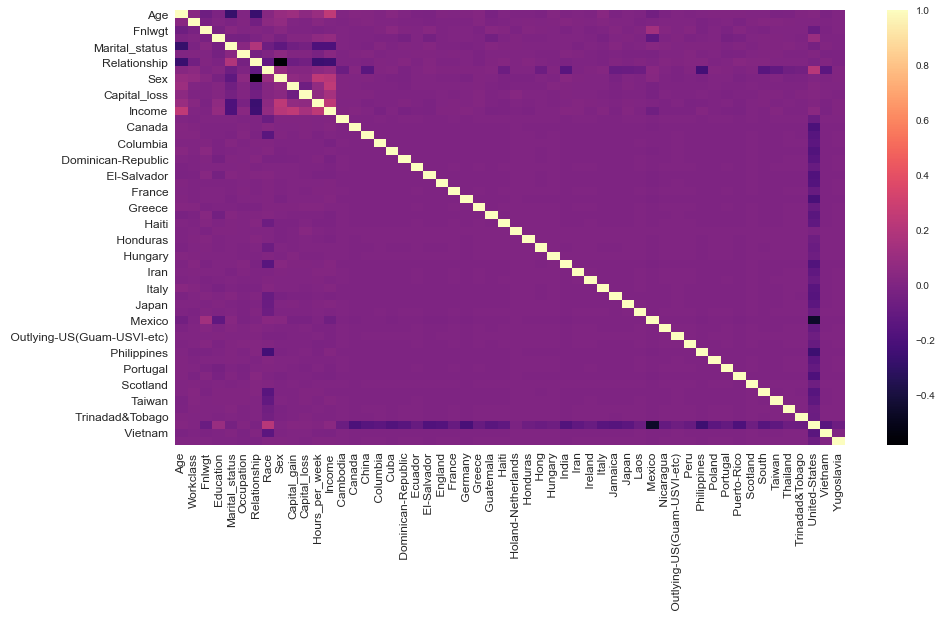

In [139]:
plt.figure(figsize=(15,8))
sns.heatmap(data_new.corr(),annot=False,cmap='magma')
plt.tick_params(labelsize=12)
plt.show()

## SPLITTING LABELS AND FEATURES

In [140]:
X = data_new.drop(columns = 'Income') 
Y = data_new['Income'] 

##### BALANCING

In [141]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()
X_over,Y_over = sm.fit_resample(X,Y)

In [142]:
round(Y_over.value_counts(normalize=True)*100,2).astype('str')+'%'

0    50.0%
1    50.0%
Name: Income, dtype: object

#### SCALING

In [143]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X_over)

In [144]:
from sklearn.linear_model import LogisticRegression

maxAccuracy = 0
maxAcc = 0

for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccuracy:
        maxAccuracy = acc
        maxAcc = i
        
print('Maximum accuracy is ',maxAccuracy, ' with Random State ',maxAcc)

Maximum accuracy is  0.7615384615384615  with Random State  196


# Splitting Data- TESTING & TRAINING

In [145]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20,random_state = maxAcc)

# MODEL BUILDING

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

In [147]:
Log_Reg = LogisticRegression()
Log_Reg.fit(x_train,y_train) 
y_pred_log = Log_Reg.predict(x_test) 

print("Accuracy Score:",accuracy_score(y_test,y_pred_log))
A1 = accuracy_score(y_test,y_pred_log)

print("Cross Validation Score: ", cross_val_score(Log_Reg,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean())
CV1 = cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean()

Accuracy Score: 0.7615384615384615
Cross Validation Score:  [0.72027027 0.73659044 0.75696466 0.75537998 0.76983054]
Avg_Cross_Validation Score:  0.7478071769339053


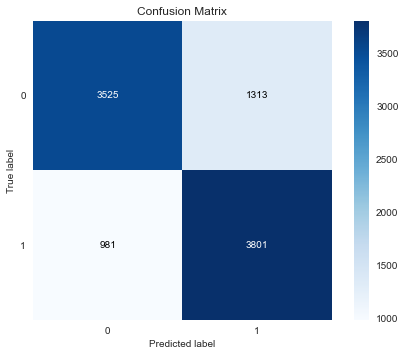

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      4838
           1       0.74      0.79      0.77      4782

    accuracy                           0.76      9620
   macro avg       0.76      0.76      0.76      9620
weighted avg       0.76      0.76      0.76      9620



In [148]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_log)
plt.show()
print(classification_report(y_test,y_pred_log))

### Random Forest Classifier

In [149]:
Rand2 = RandomForestClassifier()
Rand2.fit(x_train,y_train) 
y_pred_rand2 = Rand2.predict(x_test) 

A2 = accuracy_score(y_test,y_pred_rand2)

CV2 = cross_val_score(Rand2,X_scaled,Y_over,cv=5).mean()

In [150]:
print("Accuracy Score:",A2)
print("Cross Validation Score: ", cross_val_score(Rand2,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',CV2)

Accuracy Score: 0.8924116424116424
Cross Validation Score:  [0.84844075 0.86975052 0.90654886 0.91017777 0.90622726]
Avg_Cross_Validation Score:  0.8883329641027947


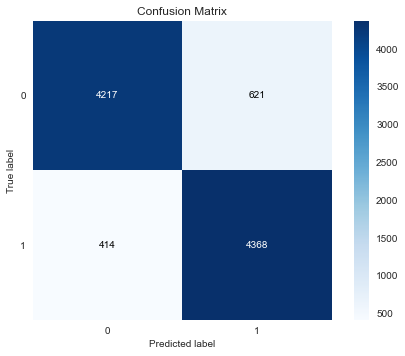

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      4838
           1       0.88      0.91      0.89      4782

    accuracy                           0.89      9620
   macro avg       0.89      0.89      0.89      9620
weighted avg       0.89      0.89      0.89      9620



In [151]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_rand2)
plt.show()
print(classification_report(y_test,y_pred_rand2))

### SVC

In [152]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train) 
y_pred_sv = sv.predict(x_test) 
A6 = accuracy_score(y_test,y_pred_sv)
print("Accuracy Score:",A6)
print("Cross Validation Score: ", cross_val_score(sv,X_scaled,Y_over,cv=5))
CV6 = cross_val_score(sv,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV6)

Accuracy Score: 0.8152806652806652
Cross Validation Score:  [0.77182952 0.7981289  0.83160083 0.83075164 0.82971203]
Avg_Cross_Validation Score:  0.8124045834441924


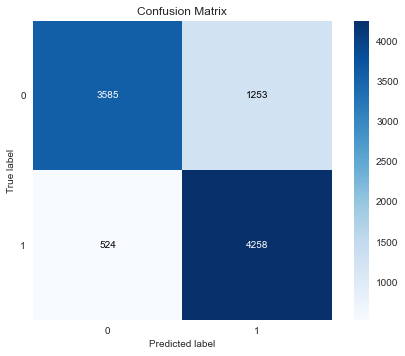

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      4838
           1       0.77      0.89      0.83      4782

    accuracy                           0.82      9620
   macro avg       0.82      0.82      0.81      9620
weighted avg       0.82      0.82      0.81      9620



In [153]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_sv)
plt.show()
print(classification_report(y_test,y_pred_sv))

### Decision Tree Classifier

In [154]:
dt = DecisionTreeClassifier() 
dt.fit(x_train,y_train) 
y_pred_dt = dt.predict(x_test) 
A3 = accuracy_score(y_test,y_pred_dt)
print("Accuracy Score:",A3)
print("Cross Validation Score: ", cross_val_score(dt,X_scaled,Y_over,cv=5))
CV3 = cross_val_score(dt,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV3)

Accuracy Score: 0.8358627858627858
Cross Validation Score:  [0.80384615 0.82359667 0.84615385 0.85809336 0.85195966]
Avg_Cross_Validation Score:  0.8380605108695347


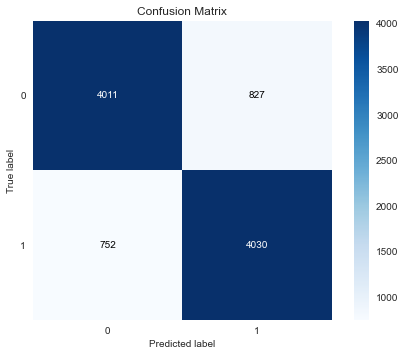

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      4838
           1       0.83      0.84      0.84      4782

    accuracy                           0.84      9620
   macro avg       0.84      0.84      0.84      9620
weighted avg       0.84      0.84      0.84      9620



In [155]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_dt)
plt.show()
print(classification_report(y_test,y_pred_dt))

### KNeighbors Classifier

In [156]:
knn=KNeighborsClassifier() 
knn.fit(x_train,y_train) 
y_pred_knn = knn.predict(x_test) 
A4 = accuracy_score(y_test,y_pred_knn)
print("Acicuracy Score:",A4)
print("Cross Validation Score: ", cross_val_score(knn,X_scaled,Y_over,cv=5))
CV4 = cross_val_score(knn,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV4)

Acicuracy Score: 0.8451143451143451
Cross Validation Score:  [0.8002079  0.82525988 0.85686071 0.8609003  0.86838549]
Avg_Cross_Validation Score:  0.8423228541743979


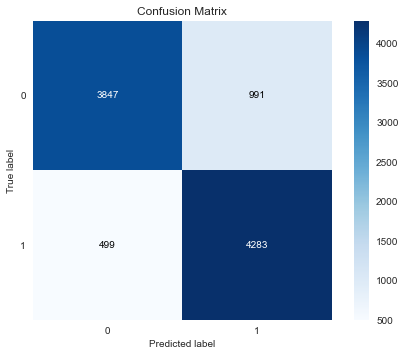

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      4838
           1       0.81      0.90      0.85      4782

    accuracy                           0.85      9620
   macro avg       0.85      0.85      0.84      9620
weighted avg       0.85      0.85      0.84      9620



In [157]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_knn)
plt.show()
print(classification_report(y_test,y_pred_knn))

### AdaBoost Classifier

In [158]:
from sklearn.ensemble import AdaBoostClassifier
adb= AdaBoostClassifier(n_estimators=10) 
adb.fit(x_train,y_train)
y_pred_adb = adb.predict(x_test)
A5 = accuracy_score(y_test,y_pred_adb)
print("Accuracy Score:",A5)
print("Cross Validation Score: ", cross_val_score(adb,X_scaled,Y_over,cv=5))
CV5 = cross_val_score(adb,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV5)

Accuracy Score: 0.8183991683991684
Cross Validation Score:  [0.79844075 0.81070686 0.82234927 0.81983574 0.82160308]
Avg_Cross_Validation Score:  0.8145871401001872


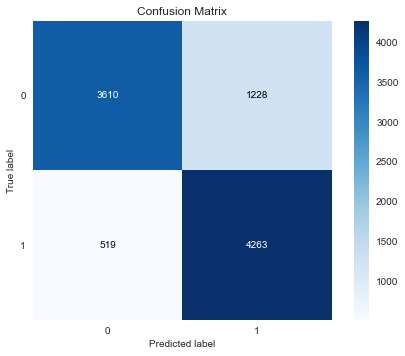

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      4838
           1       0.78      0.89      0.83      4782

    accuracy                           0.82      9620
   macro avg       0.83      0.82      0.82      9620
weighted avg       0.83      0.82      0.82      9620



In [159]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_adb)
plt.show()
print(classification_report(y_test,y_pred_adb))

### BernoulliNB

In [160]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB() 
nb.fit(x_train,y_train) 
y_pred_nb = nb.predict(x_test) 
A7 = accuracy_score(y_test,y_pred_nb)
print("Accuracy Score:",A7)
print("Cross Validation Score: ", cross_val_score(nb,X_scaled,Y_over,cv=5))
CV7 = cross_val_score(nb,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV7)

Accuracy Score: 0.7538461538461538
Cross Validation Score:  [0.72900208 0.74594595 0.74615385 0.74935024 0.74872648]
Avg_Cross_Validation Score:  0.7438357188507931


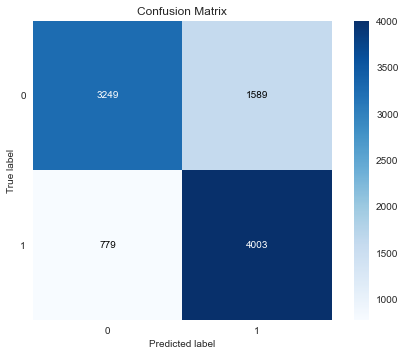

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      4838
           1       0.72      0.84      0.77      4782

    accuracy                           0.75      9620
   macro avg       0.76      0.75      0.75      9620
weighted avg       0.76      0.75      0.75      9620



In [161]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_nb)
plt.show()
print(classification_report(y_test,y_pred_nb))

In [162]:
Overall_Score = pd.DataFrame({'Model':['Logistic Regression','Random Forest Classifier','Decision Tree',
                                       'KNeighbors Classifier','AdaBoost Classifier','SVC','BernoulliNB Classifier'],
                              'Accuracy_Score':[A1,A2,A3,A4,A5,A6,A7],
                              'Cross_Validation_Score':[CV1,CV2,CV3,CV4,CV5,CV6,CV7]})
Overall_Score['Difference'] = Overall_Score['Accuracy_Score'] - Overall_Score['Cross_Validation_Score']

In [163]:
Overall_Score

,Model,Accuracy_Score,Cross_Validation_Score,Difference
0,Logistic Regression,0.761538,0.747807,0.013731
1,Random Forest Classifier,0.892412,0.888333,0.004079
2,Decision Tree,0.835863,0.838061,-0.002198
3,KNeighbors Classifier,0.845114,0.842323,0.002791
4,AdaBoost Classifier,0.818399,0.814587,0.003812
5,SVC,0.815281,0.812405,0.002876
6,BernoulliNB Classifier,0.753846,0.743836,0.010010


In [164]:
Overall_Score['Difference'].min()

-0.002197725006748863

In [166]:
Overall_Score[Overall_Score['Difference']==-0.002197725006748863]

,Model,Accuracy_Score,Cross_Validation_Score,Difference
2,Decision Tree,0.835863,0.838061,-0.002198


Decision Tree Classifier is the best model with 83.5 % accuracy score

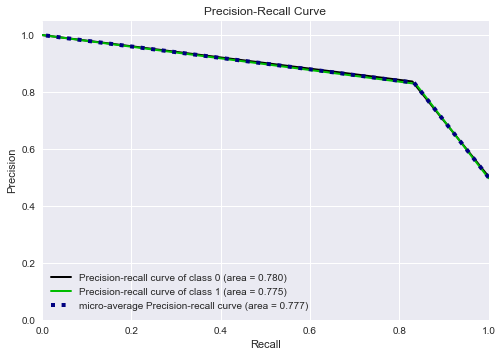

In [167]:
import matplotlib.pyplot as plt
import scikitplot as skplt
dt.fit(x_train, y_train)
probas = dt.predict_proba(x_test)
skplt.metrics.plot_precision_recall_curve(y_test, probas)
plt.show()

#### ROC CURVE

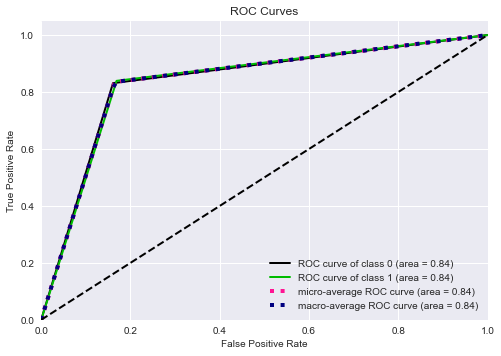

In [168]:
import matplotlib.pyplot as plt
import scikitplot as skplt
dt.fit(x_train, y_train)
probas = dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, probas)
plt.show()

# Hyper Parameter Tuning

In [169]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_features':['auto','sqrt'],'min_samples_leaf':range(10),'splitter':['best','rand'],
           'min_weight_fraction_leaf':[0.0,0.1],'min_samples_split':range(8),'criterion':['gini']}
gridsearch=GridSearchCV(estimator=dt,param_grid=param_grid,cv=5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': range(0, 10),
                         'min_samples_split': range(0, 8),
                         'min_weight_fraction_leaf': [0.0, 0.1],
                         'splitter': ['best', 'rand']})

In [170]:
print(gridsearch.best_score_, gridsearch.best_params_)

0.8288632255737518 {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}


In [171]:
DT = DecisionTreeClassifier(criterion = 'gini', max_features = 'sqrt', min_samples_leaf = 1, min_samples_split= 2, 
                                    min_weight_fraction_leaf= 0.0, splitter = 'best')
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)

# Saving the model

In [172]:
import joblib
joblib.dump(DT,'Census_Project.obj')

['Census_Project.obj']

# Performance Metrics

In [173]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Cross Validation Score: ", cross_val_score(DT,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(DT,X_scaled,Y_over,cv=5).mean())

Accuracy Score: 0.8453222453222453
Cross Validation Score:  [0.79449064 0.82744283 0.85654886 0.85320719 0.85871712]
Avg_Cross_Validation Score:  0.8343182574162926



Confusion Matrix


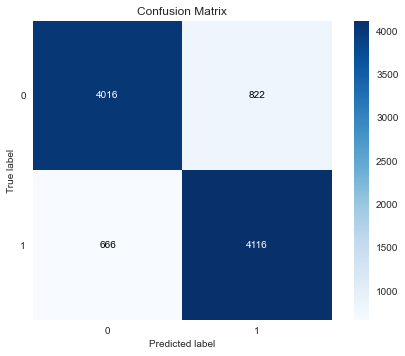

In [174]:
print('\nConfusion Matrix')
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()

In [175]:
print('\nClassification Report:\n\n',classification_report(y_test,y_pred))


Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.83      0.84      4838
           1       0.83      0.86      0.85      4782

    accuracy                           0.85      9620
   macro avg       0.85      0.85      0.85      9620
weighted avg       0.85      0.85      0.85      9620




Precision Recall Curve




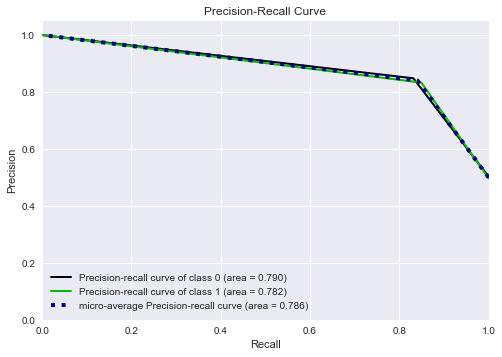

In [176]:
import matplotlib.pyplot as plt
import scikitplot as skplt
DT.fit(x_train, y_train)
probas = DT.predict_proba(x_test)
print('\nPrecision Recall Curve\n\n')
skplt.metrics.plot_precision_recall_curve(y_test, probas)
plt.show()


ROC Curve




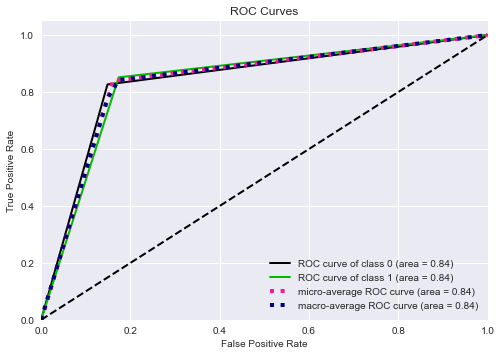

In [177]:
import matplotlib.pyplot as plt
import scikitplot as skplt
DT.fit(x_train, y_train)
probas = DT.predict_proba(x_test)
print('\nROC Curve\n\n')
skplt.metrics.plot_roc(y_test, probas)
plt.show()

In [178]:
loaded_model = joblib.load(open('Census_Project.obj','rb'))

In [180]:
score = loaded_model.score(x_test,y_test) 
print("Test score: {0:.2f} %".format(100 * score))
Predictions = loaded_model.predict(x_test)
Predictions

Test score: 84.53 %


array([0, 1, 1, ..., 0, 1, 0])

In [181]:
np.set_printoptions(threshold=np.inf)
Predictions

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

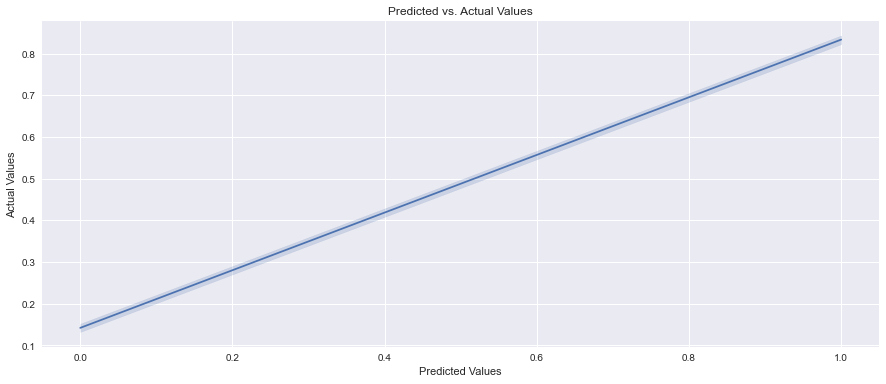

In [182]:
plt.figure(figsize=[15,6])
sns.lineplot(x=Predictions, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

In [183]:
list_of_tuples = list(zip(y_test, Predictions))
Result = pd.DataFrame(list_of_tuples,
                  columns = ['Actual', 'Predicted'])

In [184]:
pd.set_option('display.max_rows', None) 
Result

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,0,1
7,0,0
8,1,1
9,1,1
